1. 시각화
 - pclass와 survival 
 - sex와 survival
 - cabin와 survival
 - embarked와 survival
 - age(구간화)와 survival 
 - parch와 survival   
 ==> heatmap, scatterplot, boxplot 등 연습하기

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
t_data=pd.read_csv("train.csv")
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [3]:
t_data.info()
t_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# pclass와 survived
t_pclass=t_data.groupby('Pclass')['Survived'].value_counts().unstack()
t_pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [106]:
t_pclass_pt=t_data.pivot_table(index='Pclass',columns='Survived',aggfunc='size')
t_pclass_pt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


(0, 500)

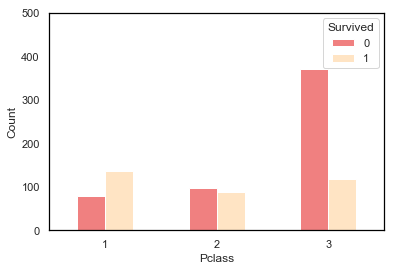

In [136]:
t_pclass_pt.plot.bar(rot=0,color=['lightcoral','bisque'])
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.ylim(0,500)

Text(0.5, 1.0, '<Pclass & Died>')

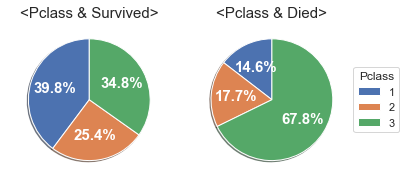

In [214]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ingredients=["1","2","3"]

wedges, texts, autotexts=ax1.pie(list(t_pclass_pt[1]),startangle=90,
                                 shadow=True,textprops=dict(color="w"),autopct='%.1f%%')
plt.setp(autotexts, size=15, weight="bold")
plt.title("<Pclass & Survived>",size=15)

ax2=fig.add_subplot(1,2,2)
wedges, texts, autotexts=ax2.pie(list(t_pclass_pt[0]),startangle=90,
                                 shadow=True,textprops=dict(color="w"),autopct='%.1f%%')
plt.legend(wedges, ingredients,
          title="Pclass",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")
plt.title("<Pclass & Died>",size=15)

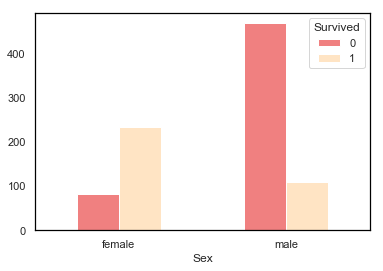

In [184]:
# sex와 survived
t_sex_sur=t_data.groupby("Sex")["Survived"].value_counts().unstack()
t_sex_sur.plot.bar(rot=0,color=['lightcoral','bisque'])

Text(0.5, 1.0, '<Sex & Died>')

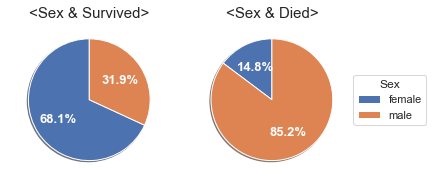

In [213]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ingredients=["female","male"]

wedges, texts, autotexts=ax1.pie(list(t_sex_sur[1]),startangle=90,
                                 shadow=True,textprops=dict(color="w"),autopct='%.1f%%')
plt.setp(autotexts, size=13, weight="bold")
plt.title("<Sex & Survived>",size=15)

ax2=fig.add_subplot(1,2,2)
wedges, texts, autotexts=ax2.pie(list(t_sex_sur[0]),startangle=90,
                                 shadow=True,textprops=dict(color="w"),autopct='%.1f%%')
plt.legend(wedges, ingredients,
          title="Sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=13, weight="bold")
plt.title("<Sex & Died>",size=15)

Text(0.5, 1.0, 'Embarked & Survived')

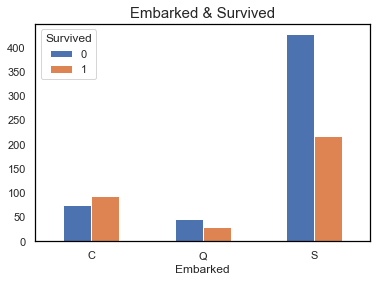

In [212]:
# embarked와 survival
t_em_sur=t_data[['Embarked','Survived']].dropna()
t_em_df=t_em_sur.pivot_table(index="Embarked",columns='Survived',aggfunc='size')
t_em_df.plot.bar(rot=0)
plt.title("Embarked & Survived",size=15)

Text(0.5, 1.0, '<Embarked & Died>')

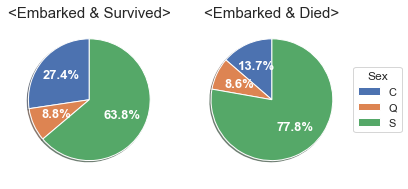

In [216]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ingredients=["C","Q","S"]

wedges, texts, autotexts=ax1.pie(list(t_em_df[1]),startangle=90,
                                 shadow=True,textprops=dict(color="w"),autopct='%.1f%%')
plt.setp(autotexts, size=13, weight="bold")
plt.title("<Embarked & Survived>",size=15)

ax2=fig.add_subplot(1,2,2)
wedges, texts, autotexts=ax2.pie(list(t_em_df[0]),startangle=90,
                                 shadow=True,textprops=dict(color="w"),autopct='%.1f%%')
plt.legend(wedges, ingredients,
          title="Sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=13, weight="bold")
plt.title("<Embarked & Died>",size=15)